In [1]:
import sys
%load_ext autoreload
%autoreload 2

sys.path.append("../libs/")
from data_prep import *

In [2]:
from sklearn.metrics import confusion_matrix
from fairlearn.postprocessing import ThresholdOptimizer

# Load prepared data and models

In [3]:




X_train_with_A, X_val_with_A, X_test_with_A, y_train, y_val, y_test, age_train,age_val,age_test,gender_train, gender_val, gender_test, ed_train, ed_val, ed_test = load_stored_data(
     age=True, gender=True, education=None,dataset_name='German_credit', scale=True)
X_train_val_with_A, y_train_val = merge_two_sets(X_train_with_A, X_val_with_A, y_train, y_val)
age_train_val, gender_train_val = merge_two_sets(age_train, age_val, gender_train, gender_val)

##Load models

import joblib

# Load the models from the files

best_rf_A = joblib.load('../ML_models/German_credit/best_random_forest_A_model.pkl')
best_knn_A = joblib.load('../ML_models/German_credit/best_knn_A_model.pkl')
best_lr_A = joblib.load('../ML_models/German_credit/best_logistic_regression_A_model.pkl')

best_lr_big_A =  joblib.load('../ML_models/German_credit/best_logistic_regression_big_A_model.pkl')
# Now you have the loaded models in the respective variables

##Compute predictions


y_train_pred_lr_A = best_lr_A.predict(X_train_with_A)
y_val_pred_lr_A = best_lr_A.predict(X_val_with_A)
y_test_pred_lr_A=best_lr_big_A.predict(X_test_with_A)
y_train_val_pred_lr_A = best_lr_A.predict(X_train_val_with_A)


y_train_pred_rf_A = best_rf_A.predict(X_train_with_A)
y_val_pred_rf_A = best_rf_A.predict(X_val_with_A)


e:\Python_install\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Chose best treshold ( TO DO : FOR ALL PARAMS OF LOG REG)

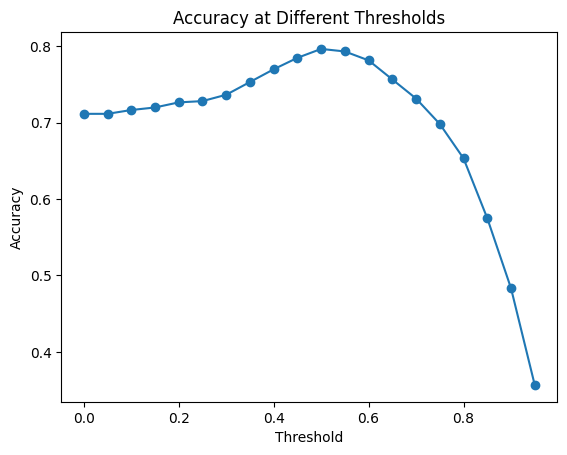

Best treshold is 0.5 and best score is 0.7966666666666666
Best threshold train 0.5


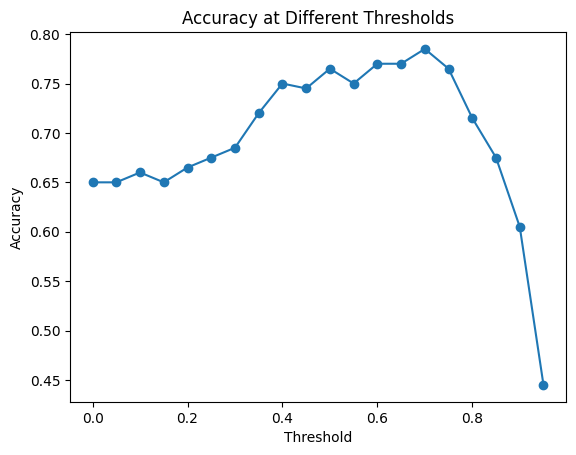

Best treshold is 0.7000000000000001 and best score is 0.785
Best threshold val: 0.7000000000000001


In [4]:
best_treshold_lr_train=find_best_threshold(y_train, best_lr_A.predict_proba(X_train_with_A))
print("Best threshold train",best_treshold_lr_train)
best_treshold_lr_val=find_best_threshold(y_val, best_lr_A.predict_proba(X_val_with_A))
print("Best threshold val:",best_treshold_lr_val)

# Metrics obtained for ML predictions

# Use Fairness optimizer

In [5]:
threshold_optimizer = ThresholdOptimizer(estimator=best_lr_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)

use_fairness_optimizer(threshold_optimizer,X_fit=X_train_with_A, y_fit=y_train_pred_lr_A, X_obs=X_val_with_A, y_obs=y_val_pred_lr_A, 
                        y_train=y_train, y_val=y_val, sensitive_1_fit= age_train, sensitive_2_fit=gender_train, sensitive_1_obs= age_val, sensitive_2_obs=gender_val,
                        name_1="AGE", name_2="GENDER", fitted=False)


threshold_optimizer = ThresholdOptimizer(estimator=best_lr_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)
use_fairness_optimizer(threshold_optimizer,X_fit=X_train_with_A, y_fit=y_train_pred_lr_A, X_obs=X_val_with_A, y_obs=y_val_pred_lr_A, 
                        y_train=y_train, y_val=y_val, sensitive_1_fit= gender_train, sensitive_2_fit=age_train, sensitive_1_obs= gender_val, sensitive_2_obs=age_val,
                        name_1="GENDER", name_2="AGE", fitted=False)


print()
print("VERIFICA")
print()


threshold_optimizer = ThresholdOptimizer(estimator=best_lr_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)
threshold_optimizer.predict_method='auto'
threshold_optimizer.fit(X_train_with_A, y_train, sensitive_features=gender_train)

############################################# ALEGE SENS FEATURE BUN #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
adjusted_gender_train = threshold_optimizer.predict(X_train_with_A, sensitive_features = gender_train)

adjusted_gender_val = threshold_optimizer.predict(X_val_with_A,sensitive_features=gender_val)


print()
print()

print("--------- SCORES AFTER OPTIMIZING FOR GENDER ---------")
print()
print("----- accuracy scores -----")


print(f' acc score train got from : {accuracy_score(y_train_pred_lr_A, y_train)} to {accuracy_score(adjusted_gender_train, y_train)}')
print(f" acc score val from : {accuracy_score(y_val_pred_lr_A, y_val)} to {accuracy_score(adjusted_gender_val, y_val)}")

print("----- Scores for fariness -----")

print(f'Gender train eq op went from: {eq_op_dif(y_train,y_train_pred_lr_A, sensitive_attribute=gender_train)} to {eq_op_dif(y_train, adjusted_gender_train, sensitive_attribute=gender_train)}')
print(f"Gender val eq op went from :  {eq_op_dif(y_val,y_val_pred_lr_A, sensitive_attribute=gender_val)} to {eq_op_dif(y_val, adjusted_gender_val, sensitive_attribute=gender_val)}")
print(f'Age train eq op went from: {eq_op_dif(y_train,y_train_pred_lr_A, sensitive_attribute=age_train)} to {eq_op_dif(y_train, adjusted_gender_train, sensitive_attribute=age_train)}')
print(f"Age val eq op went from :  {eq_op_dif(y_val,y_val_pred_lr_A, sensitive_attribute=age_val)} to {eq_op_dif(y_val, adjusted_gender_val, sensitive_attribute=age_val)}")









--------- SCORES AFTER OPTIMIZING FOR AGE ---------

----- accuracy scores -----
 acc score train got from : 0.7966666666666666 to 0.7983333333333333
 acc score val from : 0.765 to 0.76

----- Scores for fariness -----
AGE train eq op went from: 0.03911154031868658 to 0.003950660638251224
AGE val eq op went from :  0.10246679316888041 to 0.08776091081593929
GENDER train eq op went from: 0.034067922921324434 to 0.03845949111040137
GENDER val eq op went from :  0.0688405797101449 to 0.05693581780538304
--------- SCORES AFTER OPTIMIZING FOR GENDER ---------

----- accuracy scores -----
 acc score train got from : 0.7966666666666666 to 0.7966666666666666
 acc score val from : 0.765 to 0.76

----- Scores for fariness -----
GENDER train eq op went from: 0.034067922921324434 to 0.00149047162780791
GENDER val eq op went from :  0.0688405797101449 to 0.0015527950310559868
AGE train eq op went from: 0.03911154031868658 to 0.025350072428778292
AGE val eq op went from :  0.10246679316888041 to 0.0


# Do the same fairness optimization on test set

In [8]:

threshold_optimizer = ThresholdOptimizer(estimator=best_lr_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)

use_fairness_optimizer(threshold_optimizer,X_fit=X_train_val_with_A, y_fit=y_train_val_pred_lr_A, X_obs=X_test_with_A, y_obs=y_test_pred_lr_A, 
                        y_train=y_train_val, y_val=y_test, sensitive_1_fit= age_train_val, sensitive_2_fit=gender_train_val, sensitive_1_obs= age_test, sensitive_2_obs=gender_test,
                        name_1="AGE", name_2="GENDER", fitted=False, name_dataset1="train_val",name_dataset2="test")

threshold_optimizer = ThresholdOptimizer(estimator=best_lr_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)
use_fairness_optimizer(threshold_optimizer,X_fit=X_train_val_with_A, y_fit=y_train_val_pred_lr_A, X_obs=X_test_with_A, y_obs=y_test_pred_lr_A, 
                        y_train=y_train_val, y_val=y_test, sensitive_1_fit= gender_train_val, sensitive_2_fit=age_train_val, sensitive_1_obs= gender_test, sensitive_2_obs=age_test,
                        name_1="GENDER", name_2="AGE", fitted=False, name_dataset1="train_val", name_dataset2="test")













e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


--------- SCORES AFTER OPTIMIZING FOR AGE ---------

----- accuracy scores -----
 acc score train_val got from : 0.78875 to 0.79125
 acc score test from : 0.775 to 0.745

----- Scores for fariness -----
AGE train_val eq op went from: 0.05299123259412064 to 0.00966993295513141
AGE test eq op went from :  0.053417124901806834 to 0.008051846032992915
GENDER train_val eq op went from: 0.0445812433500532 to 0.04743882048943604
GENDER test eq op went from :  0.11866359447004615 to 0.10627880184331795
--------- SCORES AFTER OPTIMIZING FOR GENDER ---------

----- accuracy scores -----
 acc score train_val got from : 0.78875 to 0.78625
 acc score test from : 0.775 to 0.76

----- Scores for fariness -----
GENDER train_val eq op went from: 0.0445812433500532 to 0.0015351877184982543
GENDER test eq op went from :  0.11866359447004615 to 0.03629032258064513
AGE train_val eq op went from: 0.05299123259412064 to 0.03509541000515726
AGE test eq op went from :  0.053417124901806834 to 0.053417124901806

e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Optimize fairness by changing logistic regression treshold

In [9]:
import numpy as np

def custom_thresholding(scores, classes, treshold_unpriv, unpriv_class_indices,priv_class_indices, threshold_priv=0.5):
    print(unpriv_class_indices)


    results = np.zeros(len(scores), dtype=int)
    results[priv_class_indices] = (scores[priv_class_indices] >  threshold_priv).astype(int)
    results[unpriv_class_indices] = (scores[unpriv_class_indices] > treshold_unpriv).astype(int)

    return results

# Example usage:
scores = np.array([0.2, 0.6, 0.4, 0.7, 0.3])
classes = np.array([0, 1, 0, 1, 0])

output = custom_thresholding(scores, classes,treshold_unpriv=0.3, unpriv_class_indices=[True,False,True, False,True], priv_class_indices=[False,True,False,True, False])
print(output)


[True, False, True, False, True]
[0 1 1 1 0]


In [35]:
from scipy.optimize import minimize

def optimize_threshold_with_eq_op_dif(probabilities, sensitive_attribute, true_labels, epsilon):
    # Determine the unprivileged class based on the Equal Opportunity Difference
    preds_init=(probabilities >= 0.5).astype(int)
    if eq_op_dif(true_labels, preds_init, sensitive_attribute, no_abs=True) >= 0:
        unprivileged_class = 0
    else:
        unprivileged_class = 1
    privileged_class=1-unprivileged_class
    priv_idxs = sensitive_attribute == privileged_class
    unpriv_idxs = sensitive_attribute == unprivileged_class

    def objective_function(threshold_unprivileged):
        preds= np.array([0 for i in range(len(sensitive_attribute))])
        preds[priv_idxs]=(probabilities[priv_idxs] >= 0.5).astype(int)
        preds[unpriv_idxs]=(probabilities[unpriv_idxs]>=threshold_unprivileged).astype(int)
        #print(preds.shape, true_labels.shape)
        acc = np.mean((preds.reshape(600) == true_labels.values.reshape(600)))

        eq_op_difference = eq_op_dif(true_labels, preds, sensitive_attribute )

        return 1 - acc, abs(eq_op_difference)  # minimize 1 - accuracy 
    initial_threshold = 0.5  # initial threshold value for the unprivileged class

    result = minimize(
        lambda x: objective_function(x)[0], #minimize accuracy only
        0.5,
        bounds=[(0, 0.5)],  # threshold for unprivileged class between 0 and 0.5
        constraints={'type': 'ineq', 'fun': lambda x: epsilon - abs(objective_function(x)[1])}
    )
    return privileged_class, result.x[0]

# Example usage:
probabilities_train=best_lr_A.predict_proba(X_train_with_A)[:,1]
sensitive_attributes=age_train
true_labels=y_train

adjusted_threshold_age_train = optimize_threshold_with_eq_op_dif(probabilities_train, sensitive_attributes, true_labels,epsilon= 0.0000001)
print(adjusted_threshold_age_train)
adjusted_age_train_pred = custom_thresholding(probabilities_train, age_train,treshold_unpriv=0.45, 
                                            unpriv_class_indices=(age_train == 0), priv_class_indices=(age_train == 1))### HARDCODED FOR WHICH IS 0 AND WHICH IS 1

print("--------- SCORES AFTER OPTIMIZING FOR AGE ---------")

print(f" AGE eq op dif went from { eq_op_dif(y_train,y_train_pred_lr_A, age_train,no_abs=True)} to { eq_op_dif(y_train,adjusted_age_train_pred,age_train, no_abs=True)}")
print(f" Gender eq op dif went from { eq_op_dif(y_train,y_train_pred_lr_A, gender_train,no_abs=True)} to { eq_op_dif(y_train,adjusted_age_train_pred,gender_train, no_abs=True)}")



(1, 0.5)
[False False  True  True  True False  True False  True False  True  True
 False False False  True False  True  True  True False False  True False
  True  True False  True  True False  True False False False  True  True
 False  True  True  True  True False False False False  True  True  True
  True  True  True False  True False False False  True False False False
  True  True False False False  True  True  True False False False  True
 False  True  True False False False  True False  True  True  True False
  True False  True  True  True False False  True  True  True  True  True
  True  True False False  True False False False  True False False False
 False  True False False  True  True  True False  True  True  True  True
 False  True False False False False False False  True  True  True  True
  True  True False  True False False False  True False  True  True False
 False  True  True  True False False  True False  True False  True False
  True False False False False  True  True

## Rough work

In [ ]:
#### SAME FOR RF#####################
threshold_optimizer = ThresholdOptimizer(estimator=best_rf_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)
threshold_optimizer.predict_method='auto'
threshold_optimizer.fit(X_train_with_A, y_train, sensitive_features=age_train)


adjusted_age_train = threshold_optimizer.predict(X_train_with_A, sensitive_features = age_train)
adjusted_age_val = threshold_optimizer.predict(X_val_with_A,sensitive_features=age_val)

print("--------- SCORES AFTER OPTIMIZING FOR AGE ---------")
print()
print("----- accuracy scores -----")


print(f' acc score train got from : {accuracy_score(y_train_pred_rf, y_train)} to {accuracy_score(adjusted_age_train, y_train)}')
print(f" acc score val from : {accuracy_score(y_val_pred_rf, y_val)} to {accuracy_score(adjusted_age_val, y_val)}")

print()
print("----- Scores for fariness -----")


print(f'Gender train eq op went from: {eq_op_dif(y_train,y_train_pred_rf_A, sensitive_attribute=gender_train, no_abs=True)} to {eq_op_dif(y_train, adjusted_age_train, sensitive_attribute=gender_train, no_abs=True)}')
print(f"Gender val eq op went from :  {eq_op_dif(y_val,y_val_pred_rf_A, sensitive_attribute=gender_val)} to {eq_op_dif(y_val, adjusted_age_val, sensitive_attribute=gender_val)}")
print(f'Age train eq op went from: {eq_op_dif(y_train,y_train_pred_rf_A, sensitive_attribute=age_train)} to {eq_op_dif(y_train, adjusted_age_train, sensitive_attribute=age_train)}')
print(f"Age val eq op went from :  {eq_op_dif(y_val,y_val_pred_rf_A, sensitive_attribute=age_val)} to {eq_op_dif(y_val, adjusted_age_val, sensitive_attribute=age_val)}")



threshold_optimizer = ThresholdOptimizer(estimator=best_rf_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)
threshold_optimizer.predict_method='auto'
threshold_optimizer.fit(X_train_with_A, y_train, sensitive_features=gender_train)

############################################# ALEGE SENS FEATURE BUN #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
adjusted_gender_train = threshold_optimizer.predict(X_train_with_A, sensitive_features = gender_train)
adjusted_gender_val = threshold_optimizer.predict(X_val_with_A,sensitive_features=gender_val)


print()
print()

print("--------- SCORES AFTER OPTIMIZING FOR GENDER ---------")
print()
print("----- accuracy scores -----")


print(f' acc score train got from : {accuracy_score(y_train_pred_rf_A, y_train)} to {accuracy_score(adjusted_gender_train, y_train)}')
print(f" acc score val from : {accuracy_score(y_val_pred_rf_A, y_val)} to {accuracy_score(adjusted_gender_val, y_val)}")

print("----- Scores for fariness -----")

print(f'Gender train eq op went from: {eq_op_dif(y_train,y_train_pred_rf_A, sensitive_attribute=gender_train)} to {eq_op_dif(y_train, adjusted_gender_train, sensitive_attribute=gender_train)}')
print(f"Gender val eq op went from :  {eq_op_dif(y_val,y_val_pred_rf_A, sensitive_attribute=gender_val)} to {eq_op_dif(y_val, adjusted_gender_val, sensitive_attribute=gender_val)}")
print(f'Age train eq op went from: {eq_op_dif(y_train,y_train_pred_rf_A, sensitive_attribute=age_train)} to {eq_op_dif(y_train, adjusted_gender_train, sensitive_attribute=age_train)}')
print(f"Age val eq op went from :  {eq_op_dif(y_val,y_val_pred_rf_A, sensitive_attribute=age_val)} to {eq_op_dif(y_val, adjusted_gender_val, sensitive_attribute=age_val)}")









In [ ]:
print(y_train.shape,y_train_pred_rf.shape,gender_train.shape)

from fairlearn.metrics import equalized_odds_difference as eq_odds_dif







print("    ---------------    RESULTS FOR X WITH A   -----------------")


print()
print(" -------- metrics obtained using best random forest  ----------")

print()
print("----- equal opportunity -----")
print()

print(f" train gender eq op diff : {eq_op_dif(y_train,best_rf_A.predict(X_train_with_A), sensitive_attribute=gender_train)}")
print(f"train age eq op diff : {eq_op_dif(y_train,best_rf_A.predict(X_train_with_A), sensitive_attribute=age_train)}")

print(f"val gender eq op diff : {eq_op_dif(y_val,best_rf_A.predict(X_val_with_A), sensitive_attribute=gender_val)}")
print(f"val age eq op diff : {eq_op_dif(y_val,best_rf_A.predict(X_val_with_A), sensitive_attribute=age_val)}")

print()
print(" ------ equalized odds -----")
print()

print(f"train gender eq odds diff : {eq_odds_dif(y_train,best_rf_A.predict(X_train_with_A), sensitive_features=gender_train)}")
print(f"train age eq odds diff : {eq_odds_dif(y_train,best_rf_A.predict(X_train_with_A), sensitive_features=age_train)}")

print(f"val gender eq odds diff : {eq_odds_dif(y_val,best_rf_A.predict(X_val_with_A), sensitive_features=gender_val)}")
print(f"val age eq odds diff : {eq_odds_dif(y_val,best_rf_A.predict(X_val_with_A), sensitive_features=age_val)}")

print()
print(" ----------- metrics obtained using best logistic regression  -----------")

print()
print("----- equal opportunity -----")
print()

print(f" train gender eq op diff : {eq_op_dif(y_train,best_lr_A.predict(X_train_with_A), sensitive_attribute=gender_train)}")
print(f"train age eq op diff : {eq_op_dif(y_train,best_lr_A.predict(X_train_with_A), sensitive_attribute=age_train)}")

print(f"val gender eq op diff : {eq_op_dif(y_val,best_lr_A.predict(X_val_with_A), sensitive_attribute=gender_val)}")
print(f"val age eq op diff : {eq_op_dif(y_val,best_lr_A.predict(X_val_with_A), sensitive_attribute=age_val)}")

print()
print(" ------ equalized odds -----")
print()

print(f"train gender eq odds diff : {eq_odds_dif(y_train,best_lr_A.predict(X_train_with_A), sensitive_features=gender_train)}")
print(f"train age eq odds diff : {eq_odds_dif(y_train,best_lr_A.predict(X_train_with_A), sensitive_features=age_train)}")

print(f"val gender eq odds diff : {eq_odds_dif(y_val,best_lr_A.predict(X_val_with_A), sensitive_features=gender_val)}")
print(f"val age eq odds diff : {eq_odds_dif(y_val,best_lr_A.predict(X_val_with_A), sensitive_features=age_val)}")


In [11]:
print(best_lr_A.predict_proba(X_train_with_A))

[[0.40421056 0.59578944]
 [0.251533   0.748467  ]
 [0.02109018 0.97890982]
 ...
 [0.2147837  0.7852163 ]
 [0.04186346 0.95813654]
 [0.36276262 0.63723738]]


In [12]:

a_true=np.array([0,0,0,0,1,1,1,1])
a_pred=np.array([0,1,1,0,1,1,1,0])
sens = np.array([1,0,1,0,1,0,1,0])


print(eq_op_dif(a_true,a_pred,sens))


0.5


In [13]:
a_true=np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1])
a_pred=np.array([0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0])
sens = np.array([1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0])

import numpy as np

class ConstantPredictionModel:
    def __init__(self, prediction_array):
        self.prediction_array = prediction_array

    def fit(self, X, y):
        # This model doesn't require any training, so the fit method does nothing.
        pass

    def predict(self, X):
        # Always return the same prediction array.
        return self.prediction_array

# Create an instance of the model with your desired constant prediction.

model = ConstantPredictionModel(a_pred)

# Example usage:
input_data = np.random.rand(10, 16)  # You can use any input data; it won't affect the prediction.
predictions = model.predict(input_data)
print("Predictions:", predictions)


input=np.array([16*[0]]).reshape((16,1))
print(input.shape)

threshold_optimizer = ThresholdOptimizer(estimator=model, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)
threshold_optimizer.fit(input, a_true, sensitive_features=sens)
modified=threshold_optimizer.predict(input, sensitive_features=sens)

print(eq_op_dif(a_true,a_pred,sens))
print(eq_op_dif(a_true,modified,sens))
print("pred new : ", modified)

Predictions: [0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
(16, 1)
1.0
0.0
pred new :  [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


e:\Python_install\Lib\site-packages\fairlearn\postprocessing\_threshold_optimizer.py:292: FutureWarning: 'predict_method' default value is changed from 'predict' to 'auto'. Explicitly pass `predict_method='predict' to replicate the old behavior, or pass `predict_method='auto' or other valid values to silence this warning.
  warn(
e:\Python_install\Lib\site-packages\fairlearn\postprocessing\_threshold_optimizer.py:331: UserWarning: The value of `prefit` is `True`, but `check_is_fitted` raised `NotFittedError` on the base estimator.

If the provided base estimator has been fitted, this could mean that (1) its implementation does not conform to the sklearn estimator API, or (2) the enclosing ThresholdOptimizer has been cloned (for instance by `sklearn.model_selection.cross_validate`).

In case (1), please file an issue with the base estimator developers, but continue to use the enclosing ThresholdOptimizer with `prefit=True`. In case (2), please use `prefit=False`.
  warn(BASE_ESTIMATOR_N